# <font style="color:rgb(50,120,229)">HoughLine: How to Detect Lines using OpenCV</font>

In OpenCV, line detection using Hough Transform is implemented in the function [**`HoughLines`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) and [**`HoughLinesP`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb) [Probabilistic Hough Transform].

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
lines = cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
```

```python
lines = cv.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])
```

**Parameters**


- **`image`** -	8-bit, single-channel binary source image. The image may be modified by the function.
- **`lines`** -	Output vector of lines. Each line is represented by a 2 or 3 element vector $(\rho,\theta)$ or $(\rho,\theta,\text{votes})$ . $\rho$ is the distance from the coordinate origin $(0,0)$ (top-left corner of the image). $\theta$ is the line rotation angle in radians $( 0∼\text{vertical line},\pi/2∼\text{horizontal line} )$. votes is the value of accumulator.
- **`rho`** -	Distance resolution of the accumulator in pixels.
- **`theta`** -	Angle resolution of the accumulator in radians.
- **`threshold`** -	Accumulator threshold parameter. Only those lines are returned that get enough votes $( >\text{threshold} )$.
- **`srn`** -	For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.
- **`stn`** -	For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
- **`min_theta`** -	For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
- **`max_theta`** -	For standard and multi-scale Hough transform, maximum angle to check for lines. Must fall between min_theta and CV_PI.


### Links:
- https://www.youtube.com/watch?v=8fyWszvPCQE

In [1]:
import cv2
import matplotlib.pyplot as plt
DATA_PATH = './data/'
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

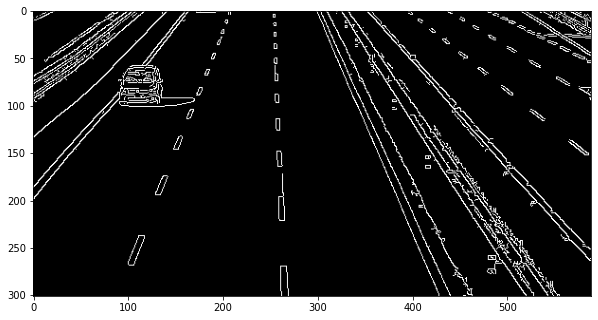

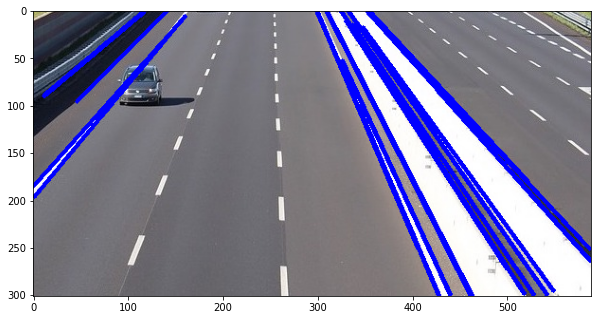

In [9]:
# Read image 
img = cv2.imread(DATA_PATH + 'images/lanes.jpg', cv2.IMREAD_COLOR)

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges)
plt.show()

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
# Show result
plt.imshow(img[:,:,::-1])
plt.show()

#### <font style="color:rgb(200,0,0)">Note</font>
Bear in mind the quality of detected lines depends heavily on the quality of the edge map. Therefore, in the real world Hough transform is used when you can control the environment and therefore obtain consistent edge maps or when you can train an edge detector for the specific kind of edges you are looking for.